# Project: Write a Data Science Blog Post

## Business Understanding:
Route 66 with be 100 Years Old in 2026  
I was curious what websites were listing the "must see sights".  Road Affair's listed 66 attractions for their "favorite things to see on Route 66". Therefore I used their data for this project of asking questions and writing a blog.

Questions to be answered:
 1. What's the percentage of each type of attractions that made Road Affair’s list?
 2. Does every state have a museum on the list?
 3. How many attractions were built in each decade? 
 
 
### Understanding the Data:
Road Affair data had 6 columns:

 - Name of Attraction - What the attraction is commonly known as 
 - Year - Year when the attraction was built
 - City - City which the attraction is located
 - State - State which the attraction is located
 - Type - Refers to if the attraction is a museum, restaurant, site, motel, etc.
 - Source of Data - What website did this data com from 
 
### Prepare Data
Determine if column data is needed
 - Name - Must be included
 - Year - Needed but if not included the data can not be implied
 - City - Not important to answer these questions
 - State - Must be included
 - Type - Must be include
 - Source of Data - Not important to answer these questions

## First was to read in the dataset file (.csv)
The .csv file was imported to the jupyter notebook directory.

Read Route 66 csv file

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
%matplotlib inline

df = pd.read_csv('./route66.csv')
df.head()

,Index,Name,Year,City,State,Type,Source
0,1,Begin sign,NaN,Chicago,Illinois,Site,roadaffair.com
1,2,Lou Mitchell's,1923.0,Chicago,Illinois,Restaurant,roadaffair.com
2,3,Gemini Giant,1960.0,Wilmington,Illinois,Site,roadaffair.com
3,4,Route 66 Hall of Fame & Museum,NaN,Pontiac,Illinois,Museum,roadaffair.com
4,5,Route 66 Hotel & Conference Center,1950.0,Springfield,Illinois,Motel,roadaffair.com


### Evaluation:

### Question 1:
What's the percentage of each type of attractions that made Road Affair’s list?

### Analyze
The only column of data to answer this question is 'Type'. This will require finding out what types of attractions are on the list and then counting how many of each type are on the list.  First task would be to verify if there's any missing data for 'Type' before getting a percentage by type.

First, to check for missing values in the Type column.
Created a function to check by column name if there's missing values.  

In [6]:
def check_missing_values(df, column_name):
    """return if there's missing values within a specific column in the cvs file
    Iput: command to execute - check_missing_values(df, 'Type)
            'Type' being the name of the column
    Output: If there's no missing values, it prints a list of values for that column
            If missing Values, it prints out 'There are missing values in the column'"""
    # Check for missing values in the specified column
    missing_values = df[column_name].isnull().sum()

    # If there are no missing values, print the list of unique values in the column
    if missing_values == 0:
        unique_values = df[column_name].unique().tolist()
        print(f"List of unique values in the '{column_name}' column:")
        print(unique_values)
    else:
        print(f"There are missing values in the '{column_name}' column.")


Call 'check_missing_values' function and check if 'Type' column has missing data

In [7]:
check_missing_values(df, 'Type')

List of unique values in the 'Type' column:
['Site', 'Restaurant', 'Museum', 'Motel', 'Water Tower', 'Bridge', 'Park', 'Theater', 'Art', 'Gas Station', 'Store']


There's no missing data in the 'Type' column.

Next, get a list of all 'Types' of all atrractions.

In [4]:
#get list of type of atrractions
# list of values of 'Type' column
make_list = df['Type'].tolist()
  
# show the list
print(make_list)


['Site', 'Restaurant', 'Site', 'Museum', 'Motel', 'Site', 'Water Tower', 'Bridge', 'Site', 'Park', 'Site', 'Motel', 'Site', 'Museum', 'Theater', 'Art', 'Gas Station', 'Museum', 'Store', 'Bridge', 'Museum', 'Gas Station', 'Restaurant', 'Site', 'Site', 'Motel', 'Museum', 'Restaurant', 'Site', 'Restaurant', 'Site', 'Restaurant', 'Museum', 'Museum', 'Gas Station', 'Water Tower', 'Restaurant', 'Museum', 'Store', 'Site', 'Restaurant', 'Site', 'Store', 'Motel', 'Museum', 'Museum', 'Site', 'Restaurant', 'Store', 'Store', 'Park', 'Store', 'Site', 'Site', 'Museum', 'Restaurant', 'Motel', 'Site', 'Restaurant', 'Site', 'Museum', 'Site', 'Restaurant', 'Museum', 'Motel', 'Site']


Now, get a list of just the unique values of 'Type'.

In [5]:
#get unique list of types
# list of values of 'Type' column

#find unique type values
types = df.Type.unique()

#sort values alphabetically
types.sort()

#display sorted values
types

array(['Art', 'Bridge', 'Gas Station', 'Motel', 'Museum', 'Park',
       'Restaurant', 'Site', 'Store', 'Theater', 'Water Tower'], dtype=object)

There's 11 different 'Types' of attractions which should be displayed in the final pie chart.

Next, get the count of attractions by Type

In [4]:
#get total number of attractions
df.shape[0]

#count attraction by type
df['Type'].value_counts()[df.Type.unique()]


Site           19
Restaurant     11
Museum         13
Motel           6
Water Tower     2
Bridge          2
Park            2
Theater         1
Art             1
Gas Station     3
Store           6
Name: Type, dtype: int64

### Visualize

There's a total of 66 attractions on the list.  
Now to biuld the pie chart to visiually see how many of each type of attraction is on the list.

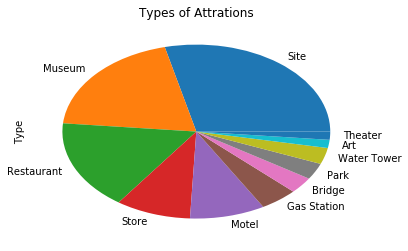

In [5]:
#Provide the counts for each 'Type' status
status_vals = df.Type.value_counts()

#Ggenerate a pie chart of attraction by type
(status_vals/df.shape[0]).plot(kind="pie");

#Title for pie chart
plt.title("Types of Attrations");

### Explanation of Visualization

'Site' has the most type of attraction, followed by Mueseum and the Restaurant.  
This lead to another question, what is the percentage of each 'Type'.
This provides a table by Type with the percentage.

In [16]:
# Calculate the percentage for each 'Type' status
percentage_vals = (status_vals / df.shape[0]) * 100

# Round the percentages to one decimal place
rounded_percentage_vals = percentage_vals.round(1)

# Print the list of percentages
print("Percentage by Type:")
print(rounded_percentage_vals)

Percentage by Type:
Site           28.8
Museum         19.7
Restaurant     16.7
Store           9.1
Motel           9.1
Gas Station     4.5
Bridge          3.0
Park            3.0
Water Tower     3.0
Art             1.5
Theater         1.5
Name: Type, dtype: float64


Site has 28.8% of the list with Museum and Restaruant being close to each other as 19.7% & 16.7%.

### Question 2:  
Does every state have a museum on the list?

### Analyze
To answer this question 'Type', 'Name', and 'State' columns are needed.  
It's know that Route 66 went through only 8 states.  
So the real question is if each of those states' have a museum on the list from Road Affair.

First, check for missing values in the 'Type' column

In [8]:
check_missing_values(df, 'Type')

List of unique values in the 'Type' column:
['Site', 'Restaurant', 'Museum', 'Motel', 'Water Tower', 'Bridge', 'Park', 'Theater', 'Art', 'Gas Station', 'Store']


Next, check for missing values in the 'Name' column

In [10]:
check_missing_values(df, 'Name')

List of unique values in the 'Name' column:
['Begin sign', "Lou Mitchell's", 'Gemini Giant', 'Route 66 Hall of Fame & Museum', 'Route 66 Hotel & Conference Center', "Henry's Rabbit Ranch", "World's Largest Catsup Bottle", 'Chain of Rocks Bridge', 'Gateway Arch', 'Route 66 State Park', 'Meramec Caverns', 'Wagon Wheel Motel', "World's Second Largest Rocking Chair", 'Route 66 Car Museum', '66 Drive-In Theatre', 'Route 66 Mural Park', 'Cars on the Route', 'Galena Mining and Historical Museum', 'Eisler Brothers Old Riverton Store', 'Brush Creek Bridge', 'Baxter Springs Heritage Center & Museum', 'Baxter Springs Independent Oil and Gas Service Station', 'Dairy King', "Ed Galloway's Totem Pole Park", 'Blue Whale of Catoosa', 'The Campbell Hotel', 'Heart of Route 66 Auto Museum', 'Rock Cafe', 'Arcadia Round Barn', 'Pops', 'Milk Bottle Grocery', "Lucille's Roadhouse", 'Oklahoma Route 66 Museum', 'National Route 66 Museum', 'Tower Station and U-Drop Inn Cafe', 'Leaning Tower of Texas', 'Big Texa

Next, check for missing values in the 'State' column

In [9]:
check_missing_values(df, 'State')

List of unique values in the 'State' column:
['Illinois', 'Missouri', 'Kansas', 'Oklahoma', 'Texas', 'New Mexico', 'Arizona', 'California']


Confirmed there's no missing values for 'Type', 'Name', and 'State'

Sort the list of state is alphabetically order & confirm the count of states

In [2]:
#get unique list of states & count them
#find unique state values
state_list = df.State.unique()

#sort values alphabetically
state_list.sort()

#count number of states in list
state_count = state_list.shape[0]


print("State List:", state_list)
print("Count of States:", state_count)

State List: ['Arizona' 'California' 'Illinois' 'Kansas' 'Missouri' 'New Mexico'
 'Oklahoma' 'Texas']
Count of States: 8


There's 8 states which on the ones that Route 66 went through.

Get the total count of Museums on the list.
Generate a list by State and Name of the attraction if the 'Type' is museum

In [3]:
#find unique museums values
museum_list = df[(df['Type'] == 'Museum')]

#sort values alphabetically by state
sorted_museum_list = museum_list.sort_values(by='State')

#count number of states in list
museum_count = museum_list.shape[0]

print("Count of Museums:", museum_count)

# Dispaly Museum Name, Type, & State
selected_columns = sorted_museum_list[['State', 'Name']]

# Print the selected columns
print(selected_columns)


Count of Museums: 13
         State                                     Name
54     Arizona                 Ash Fork Route 66 Museum
60  California              Route 66 Mother Road Museum
63  California               California Route 66 Museum
3     Illinois           Route 66 Hall of Fame & Museum
17      Kansas      Galena Mining and Historical Museum
20      Kansas  Baxter Springs Heritage Center & Museum
13    Missouri                      Route 66 Car Museum
44  New Mexico               New Mexico Route 66 Museum
45  New Mexico                     Route 66 Auto Museum
26    Oklahoma            Heart of Route 66 Auto Museum
32    Oklahoma                 Oklahoma Route 66 Museum
33    Oklahoma                 National Route 66 Museum
37       Texas        Jack Sisemore Traveland RV Museum


### Visualize
Visually display with a bar chart the count of museums per state.

Count of Museums by State:
 Arizona       1
California    2
Illinois      1
Kansas        2
Missouri      1
New Mexico    2
Oklahoma      3
Texas         1
Name: State, dtype: int64


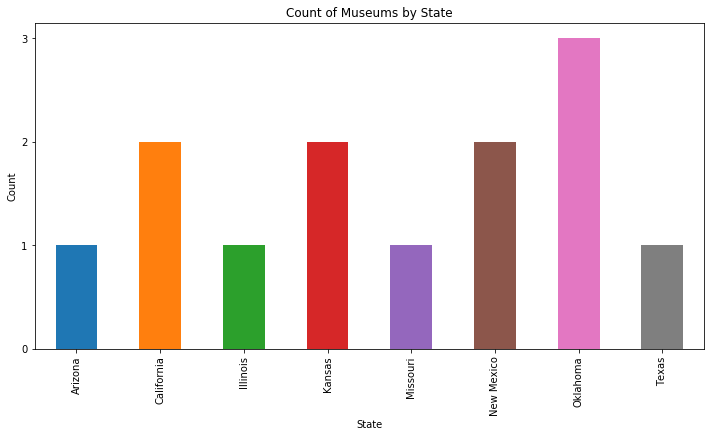

In [5]:
#get a count of museums by state
museum_count_by_state = museum_list['State'].value_counts().sort_index()
print("Count of Museums by State:\n", museum_count_by_state)

#museum_count_by_state = museum_list['State'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
museum_count_by_state.plot.bar()
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Museums by State')

# Setting whole number ticks on the y-axis
plt.yticks(range(int(max(museum_count_by_state))+1))

#Plot bar chart
plt.show()

### Explanation for Visualization
Each state does have at least 1 museum to visit while traveling Route 66.  
These are a great place to stop to get local information and history.  
It makes seeing the 'sites' on the list that more interesting to stop for a picture.

### Question 3:
How many attractions were built in each decade? 

### Analyze
Since Route 66 will be 100 soon and knowing the heyday of the Route started shortly after many Americans were able to buy cars (mid 1920s), that lead me to my final question.
Will there be plenty of the sites to see from the Heyday?

To answer this question, the 'Year' was needed.  There's a follow on question after seeing the visual of the places built by decade.  More details on that later.

Determine if there's missing values for the 'Year' column

In [11]:
check_missing_values(df, 'Year')

There are missing values in the 'Year' column.


There are missing values for 'Year'.  Since the question is wanting to know the year the attraction was built, the year can not be implied.  Therefore the best approach is to get the count of the attractions missing the year.  There will need to be a bar for that in the final bar chart.

Next is to get the list of years an attraction was built.

In [6]:
#get list of years built of the atrractions
# list of values of 'Year' column
make_list = df['Year'].tolist()
   
    
# show the list
print(make_list)

[nan, 1923.0, 1960.0, nan, 1950.0, 1993.0, 1949.0, 1929.0, nan, nan, nan, 1935.0, 2008.0, nan, 1949.0, nan, nan, nan, 1925.0, 1923.0, nan, 1930.0, 1927.0, 1937.0, 1972.0, 1927.0, nan, 1939.0, 1898.0, 2007.0, 1930.0, nan, nan, nan, 1936.0, 1980.0, 1960.0, nan, nan, 1974.0, 1928.0, nan, 1940.0, 1939.0, nan, nan, nan, 1987.0, 1940.0, 1913.0, nan, 1949.0, 1999.0, nan, nan, 1953.0, 1937.0, nan, nan, nan, 1911.0, 2000.0, 1947.0, nan, 1949.0, nan]


There's a lot on 'nan' in the list. 
The next search was to determine to the oldest to newest year an attraction was built so it's know what decade is needed for the first set of data.

In [7]:
#get unique list of years
#find unique year values
year = df.Year.unique()

#sort values
year.sort()

#display sorted values
year

array([ 1898.,  1911.,  1913.,  1923.,  1925.,  1927.,  1928.,  1929.,
        1930.,  1935.,  1936.,  1937.,  1939.,  1940.,  1947.,  1949.,
        1950.,  1953.,  1960.,  1972.,  1974.,  1980.,  1987.,  1993.,
        1999.,  2000.,  2007.,  2008.,    nan])

1898 is the oldest year on the list therefore the first decade will be 1890-1899.  The newest attraction was built in 2008, therefore the last decade for the list is 2000-2010. There will also be a bar for 'No Year'.

This is to get a total number of attraction built in a single year.

In [8]:
#get total number of attractions by year built
df.shape[0]

#count attraction by type
df['Year'].value_counts()[df.Year.unique()]

NaN        NaN
 1923.0    2.0
 1960.0    2.0
 1950.0    1.0
 1993.0    1.0
 1949.0    4.0
 1929.0    1.0
 1935.0    1.0
 2008.0    1.0
 1925.0    1.0
 1930.0    2.0
 1927.0    2.0
 1937.0    2.0
 1972.0    1.0
 1939.0    2.0
 1898.0    1.0
 2007.0    1.0
 1936.0    1.0
 1980.0    1.0
 1974.0    1.0
 1928.0    1.0
 1940.0    2.0
 1987.0    1.0
 1913.0    1.0
 1999.0    1.0
 1953.0    1.0
 1911.0    1.0
 2000.0    1.0
 1947.0    1.0
Name: Year, dtype: float64

There are several attractions that were built in the same year.  This was more for curiousity sake.  The important piece is to get the count of attraction built by decade.
Starting with decade 1890 to 1899 with the final decade being 2010-2019.  Plus the count for 'No Year'.

In [11]:
#Get count for Decade 1890 to 1899
start_year_1890 = 1890
end_year_1890 = start_year_1890 + 9  # Add 9 to get the end year of the decade
decade_1890 = df[(df['Year'] >= start_year_1890) & (df['Year'] <= end_year_1890)]
decade_count_1890 = decade_1890.shape[0]
print("Count of data points for the decade 1890: ", decade_count_1890)


#Get count for Decade 1900 to 1909
start_year_1900 = 1900
end_year_1900 = start_year_1900 + 9  # Add 9 to get the end year of the decade
decade_1900 = df[(df['Year'] >= start_year_1900) & (df['Year'] <= end_year_1900)]
decade_count_1900 = decade_1900.shape[0]
print("Count of data points for the decade 1900: ", decade_count_1900)


#Get count for Decade 1910 to 1919
start_year_1910 = 1910
end_year_1910 = start_year_1910 + 9  # Add 9 to get the end year of the decade
decade_1910 = df[(df['Year'] >= start_year_1910) & (df['Year'] <= end_year_1910)]
decade_count_1910 = decade_1910.shape[0]
print("Count of data points for the decade 1910: ", decade_count_1910)


#Get count for Decade 1920 to 1929
start_year_1920 = 1920
end_year_1920 = start_year_1920 + 9  # Add 9 to get the end year of the decade
decade_1920 = df[(df['Year'] >= start_year_1920) & (df['Year'] <= end_year_1920)]
decade_count_1920 = decade_1920.shape[0]
print("Count of data points for the decade 1920: ", decade_count_1920)


#Get count for Decade 1930 to 1939
start_year_1930 = 1930
end_year_1930 = start_year_1930 + 9  # Add 9 to get the end year of the decade
decade_1930 = df[(df['Year'] >= start_year_1930) & (df['Year'] <= end_year_1930)]
decade_count_1930 = decade_1930.shape[0]
print("Count of data points for the decade 1930: ", decade_count_1930)


#Get count for Decade 1940 to 1949
start_year_1940 = 1940
end_year_1940 = start_year_1940 + 9  # Add 9 to get the end year of the decade
decade_1940 = df[(df['Year'] >= start_year_1940) & (df['Year'] <= end_year_1940)]
decade_count_1940 = decade_1940.shape[0]
print("Count of data points for the decade 1940: ", decade_count_1940)


#Get count for Decade 1950 to 1959
start_year_1950 = 1950
end_year_1950 = start_year_1950 + 9  # Add 9 to get the end year of the decade
decade_1950 = df[(df['Year'] >= start_year_1950) & (df['Year'] <= end_year_1950)]
decade_count_1950 = decade_1950.shape[0]
print("Count of data points for the decade 1950: ", decade_count_1950)


#Get count for Decade 1960 to 1969
start_year_1960 = 1960
end_year_1960 = start_year_1960 + 9  # Add 9 to get the end year of the decade
decade_1960 = df[(df['Year'] >= start_year_1960) & (df['Year'] <= end_year_1960)]
decade_count_1960 = decade_1960.shape[0]
print("Count of data points for the decade 1960: ", decade_count_1960)


#Get count for Decade 1970 to 1979
start_year_1970 = 1970
end_year_1970 = start_year_1970 + 9  # Add 9 to get the end year of the decade
decade_1970 = df[(df['Year'] >= start_year_1970) & (df['Year'] <= end_year_1970)]
decade_count_1970 = decade_1970.shape[0]
print("Count of data points for the decade 1970: ", decade_count_1970)


#Get count for Decade 1980 to 1989
start_year_1980 = 1980
end_year_1980 = start_year_1980 + 9  # Add 9 to get the end year of the decade
decade_1980 = df[(df['Year'] >= start_year_1980) & (df['Year'] <= end_year_1980)]
decade_count_1980 = decade_1980.shape[0]
print("Count of data points for the decade 1980: ", decade_count_1980)


#Get count for Decade 1990 to 1999
start_year_1990 = 1990
end_year_1990 = start_year_1990 + 9  # Add 9 to get the end year of the decade
decade_1990 = df[(df['Year'] >= start_year_1990) & (df['Year'] <= end_year_1990)]
decade_count_1990 = decade_1990.shape[0]
print("Count of data points for the decade 1990: ", decade_count_1990)


#Get count for Decade 2000 to 2009
start_year_2000 = 2000
end_year_2000 = start_year_2000 + 9  # Add 9 to get the end year of the decade
decade_2000 = df[(df['Year'] >= start_year_2000) & (df['Year'] <= end_year_2000)]
decade_count_2000 = decade_2000.shape[0]
print("Count of data points for the decade 2000: ", decade_count_2000)


#Get count for Decade 2010 to 2019
start_year_2010 = 2010
end_year_2010 = start_year_2010 + 9  # Add 9 to get the end year of the decade
decade_2010 = df[(df['Year'] >= start_year_2010) & (df['Year'] <= end_year_2010)]
decade_count_2010 = decade_2010.shape[0]
print("Count of data points for the decade 2010: ", decade_count_2010)


# Count NaN values of Year column
count_nan = df['Year'].isna().sum().sum()
print("Count of data points for no year listed: ", count_nan)

Count of data points for the decade 1890:  1
Count of data points for the decade 1900:  0
Count of data points for the decade 1910:  2
Count of data points for the decade 1920:  7
Count of data points for the decade 1930:  8
Count of data points for the decade 1940:  7
Count of data points for the decade 1950:  2
Count of data points for the decade 1960:  2
Count of data points for the decade 1970:  2
Count of data points for the decade 1980:  2
Count of data points for the decade 1990:  2
Count of data points for the decade 2000:  3
Count of data points for the decade 2010:  0
Count of data points for no year listed:  28


### Visualize
There are 2 decades which no attraction was built (1900-1909 & 2010-2019).  Note there are 28 attractions that had no date listed.  So the dataset really only has 38 attractions with a year built.

To visualize the data for the decade which the most attractions were built.

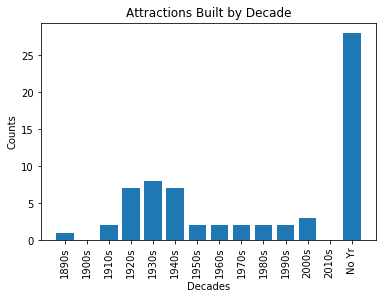

In [13]:
# plot attraction built by deacdes
decades = ['1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s','2010s', 'No Yr']
counts = [decade_count_1890, decade_count_1900, decade_count_1910, decade_count_1920, decade_count_1930, decade_count_1940, decade_count_1950, decade_count_1960, decade_count_1970, decade_count_1980, decade_count_1990, decade_count_2000, decade_count_2010, count_nan]

# Plotting the bar chart
plt.bar(decades, counts)
plt.xlabel('Decades')
plt.ylabel('Counts')
plt.title('Attractions Built by Decade')

plt.xticks(rotation=90)
plt.show()

### Explanation of Visualization
The most attractions were built in the 20's - 40's which would of been the heyday of the Route.  It is intersting to see attractions continued to be built from the 50's into the new century.  Route 66 was decomissioned in 1985 and there are attraction built after that.

The follow of question was, what attractions were built in the 50's or later.

In [19]:
#what attractions were built after 1950?
built_after_1950 = df[(df['Year'] >= 1950)]

#sort values alphabetically by state
sorted_1950plus_list = built_after_1950.sort_values(by='Year')

# Dispaly Museum Name, Type, & State
selected_columns = sorted_1950plus_list[['Year', 'Name', 'City', 'State', 'Type']]

# Print the selected columns
print(selected_columns)

      Year                                  Name         City       State  \
4   1950.0    Route 66 Hotel & Conference Center  Springfield    Illinois   
55  1953.0        Delgadillo's Snow Cap Drive-In     Seligman     Arizona   
2   1960.0                          Gemini Giant   Wilmington    Illinois   
36  1960.0                 Big Texan Steak Ranch     Amarillo       Texas   
24  1972.0                 Blue Whale of Catoosa      Catoosa    Oklahoma   
39  1974.0                        Cadillac Ranch     Amarillo       Texas   
35  1980.0                Leaning Tower of Texas        Groom       Texas   
47  1987.0                              66 Diner  Albuquerque  New Mexico   
5   1993.0                  Henry's Rabbit Ranch     Staunton    Illinois   
52  1999.0           Standin' on the Corner Park      Winslow     Arizona   
61  2000.0        Elmer Long's Bottle Tree Ranch   Oro Grande  California   
29  2007.0                                  Pops      Arcadia    Oklahoma   

From the 38 attractions with a year built, 13 of them were built in 1950 or later.  That's over a 1/3 of the attractions.  In those 13, 7 were sites.  It just shows that people continue to build new attractions to bring people to their business.  Let's keep Route 66 hopin. 